In [106]:
import os
from control.matlab import ss, lsim, linspace, c2d
from PID import PID
from sim3 import vt,dc,ap,qd
import matplotlib.pyplot as plt
import numpy as np
import time
import statistics

In [252]:
# you can use vt, dc and ap
a = vt()
print(a.sysd)
a.ref = [0] * 251 + [2] * 250
a.thres=0.1

A = [[0.84648172]]

B = [[0.09211097]]

C = [[1.]]

D = [[0.]]

dt = 0.02



In [253]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["font.family"] = "Times New Roman"

In [254]:
#only for vt
control_inputs = []
measures=[]
x_just_before = 0
xout=1
pid = PID(P=a.p, I=a.i, D=a.d, current_time=0)
pid.setWindup(100)
pid.setSampleTime(a.Ts)
limit = 5
dist = 1
ratio = 1.2
mu =0
sigma = 0.12
np.random.seed(1)
s = np.random.normal(mu, sigma, a.slot+1)
fmcount = 0
print(s)
for i in range(0, a.slot+1):
    a.y_real_arr.append(a.yreal)
    # sensor attack here
    a.score.append(a.s)
    pid.SetPoint = a.ref[i]
    pid.update(feedback_value=a.ymeasure, current_time=i * a.Ts)
    dist = abs(a.ref[i]-a.safeset['up'][0])
#     print(dist)
    a.cin = pid.output
#     print(a.cin)
#     print(a.ymeasure,i,a.cin,xout)
    if a.cin>limit:
        a.cin=limit
    elif a.cin<-(limit):
        a.cin = -(limit)
    else:
        a.cin=a.cin
    control_inputs.append(a.cin)
    a.att=s[i]
    if i>a.place:
        fmbetween = int(a.place/fmcount)
        a.att = 0
        if (i-a.place)%fmbetween == 0:
            a.att+=a.drift
        if (a.score[-1]==a.thres):
            a.att+=s[i]
        else:
            a.att += a.thres+a.drift-a.score[-1]
        
    
    yout, T, xout = lsim(a.sysc, a.cin, [0, a.Ts], a.ymeasure)
    ymax, T, xout1 = lsim(a.sysc, a.maxc, [0, a.Ts], a.ymeasure)
    yout2, T, xout2 = lsim(a.sysc, a.cin, [0, a.Ts], a.yreal)
    a.yreal=yout2[-1]
    ypred = yout[-1]
#     s = np.random.normal(mu, sigma, 1)
    a.ymeasure = yout[-1]-a.att

    
    a.s = a.score[-1]+abs(ypred-a.ymeasure)-a.drift
    print(a.s)
    if(a.s<0):
        a.s=0
    if(i==a.place+1):
        x_just_before = xout
    if(a.s>a.thres and i<=a.place):
        fmcount += 1
        a.s=0
    measures.append(a.ymeasure)
# print(control_inputs[a.place+2:])
# print(a.score[a.place+2:])
# print(x_just_before)


[ 1.94921444e-01 -7.34107696e-02 -6.33806103e-02 -1.28756235e-01
  1.03848916e-01 -2.76184644e-01  2.09377412e-01 -9.13448281e-02
  3.82846915e-02 -2.99244451e-02  1.75452952e-01 -2.47216885e-01
 -3.86900645e-02 -4.60865226e-02  1.36052333e-01 -1.31986952e-01
 -2.06913849e-02 -1.05343010e-01  5.06564961e-03  6.99378256e-02
 -1.32074301e-01  1.37366845e-01  1.08190886e-01  6.02993207e-02
  1.08102714e-01 -8.20473431e-02 -1.47468271e-02 -1.12292332e-01
 -3.21465696e-02  6.36426560e-02 -8.29992902e-02 -4.76104232e-02
 -8.24607240e-02 -1.01424677e-01 -8.05495357e-02 -1.51975187e-03
 -1.34077242e-01  2.81298837e-02  1.99176261e-01  8.90452993e-02
 -2.30202663e-02 -1.06515476e-01 -8.96589953e-02  2.03094552e-01
  6.09693057e-03 -7.64394776e-02  2.29098582e-02  2.52030616e-01
  1.44190743e-02  7.40643732e-02  3.60204384e-02 -4.22699816e-02
 -1.37102184e-01 -4.19211267e-02 -2.50673080e-02  7.03947829e-02
  1.00678010e-01  1.11732250e-01  3.42704790e-02  1.06216940e-01
 -9.05277529e-02  1.50344

0.18339908481676775
-0.0901638266741448
-0.11475972081859331
-0.09284229089836737
0.03977485351051102
-0.04574820287236671
-0.03839161921462747
-0.08162380813215944
0.03270705062951931
-0.04966722291486883
-0.05961782238776087
0.03518710590387142
-0.07155925092605062
-0.04591655235451669
-0.052468668405716845
-0.09111154893147214
-0.08632019074528331
-0.11122647555032666
0.019240628399252363
-0.05642024563566078
0.1085590450009177
0.013326803827260536
-0.027587220640714255
0.07529260087395087
0.027570914509426336
-0.041995221052926524
-0.02268579926357331
0.005333051364871055
-0.06656156562045774
-0.021119325785951076
-0.052523348277709214
0.11458536900108413
0.03983419998206977
0.1311168272299238
0.07808655189889202
0.06495322199845788
0.0792470698256253
0.19397653827006234
-0.08082006023061789
0.04112109472529232
0.05484705193886735
0.0052299245974584685
0.03365232978242616
0.018753001100342115
-0.02644353771029395
-0.06780519804537266
0.048904800028947426
-0.05560301040576551
0.0740

In [255]:
fmbetween

12

In [256]:
# ---------------------------------------
max_k = 450
attack_inputs = control_inputs[a.place+2:]
print('attack_inputs=', attack_inputs)
for j in range(0, len(attack_inputs)-10):
    temp = attack_inputs[j:j+10]
    if 5 in temp or 5 in temp:
        continue
    vari = statistics.variance(temp)
    print(vari, end= ' ')
    if(vari < 1e-6):
        max_k = j
        break
print('max_k', max_k)

attack_inputs = np.array([control_inputs[a.place+2:]])
x_just_before = x_just_before[-1]
print(x_just_before, len(x_just_before.shape))
if len(x_just_before.shape) == 0:
    x_a = np.array([[x_just_before]])
else:
    x_a = np.array([[item] for item in x_just_before])
# def get_safetime(self, x_a, safe_set_lo, safe_set_up, control_list: np.array, max_k)
safe_set_lo = a.safeset['lo']
safe_set_up = a.safeset['up']
k = a.est.get_safetime(x_a, safe_set_lo, safe_set_up, attack_inputs, max_k)
print(k)

# ---------------------------------------
        


attack_inputs= [3.083790290318321, 3.346470452626296, 3.346470452626296, 3.5408949224285906, 3.5408949224285906, 3.715829302090938, 3.715829302090938, 3.870125016565871, 3.9381745163724053, 3.9381745163724053, 4.062258675489328, 4.062258675489328, 4.153575721939555, 4.153575721939555, 4.243432280464411, 4.243432280464411, 4.318876242426826, 4.318876242426826, 4.38162593547142, 4.38162593547142, 4.433371003397685, 4.433371003397685, 4.475702510956509, 4.475702510956509, 4.495704189733092, 4.495704189733092, 4.5242326615298385, 4.5242326615298385, 4.547576023355081, 4.547576023355081, 4.566533361588605, 4.566533361588605, 4.581818166311106, 4.588588012921344, 4.588588012921344, 4.693049156941761, 4.693049156941761, 4.617073101898141, 4.617073101898141, 4.620790413880993, 4.620790413880993, 4.623867414216436, 4.623867414216436, 4.626393528512626, 4.626393528512626, 4.628451462912312, 4.628451462912312, 4.723715741585187, 4.723715741585187, 4.640471524789239, 4.639216225744642, 4.639216225

<ipython-input-257-c7d2ec2c2829>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


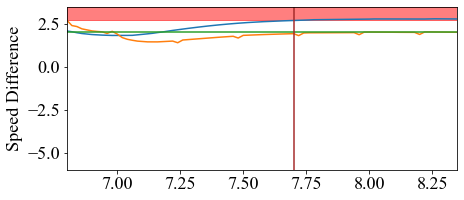

In [257]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_ylim(-6,3.5)
ax.set_xlim(6.8,8.35)
ax.plot(a.t_arr, a.y_real_arr,label='real')
ax.plot(a.t_arr, measures,label='measure')
ax.plot(a.t_arr, a.ref,label='ref')
ax.axhspan(2.7, 3.5, color='r', alpha=0.5)
ax.axvline((a.place+2+k)*a.Ts, color='brown',label='stable')
ax.set_ylabel('Speed Difference', fontsize=18)
# ax.legend()
fig.show()
# fig.savefig('vt_unsafe_ref.pdf',bbox_inches='tight')
# fig.savefig('vt_safe.pdf',bbox_inches='tight')
# fig.savefig('vt_unsafe_thres.pdf',bbox_inches='tight')

In [203]:
# you can use vt, dc and ap\
import math
a = dc()
print(a.sysd)
# a.ref = [math.pi / 2+1] * 71 + [-math.pi / 2] * 50
a.thres = 4
a.drift = 1

A = [[ 1.          0.08645683  0.00979615]
     [ 0.          0.13523578  0.06686454]
     [ 0.         -0.00133729  0.67015208]]

B = [[0.00155661]
     [0.01959229]
     [0.329652  ]]

C = [[1. 0. 0.]]

D = [[0.]]

dt = 0.2



In [62]:
#for ap and dc
control_inputs = []
measures = []
x_just_before = 0
pid = PID(P=a.p, I=a.i, D=a.d, current_time=0)
pid.setWindup(100)
pid.setSampleTime(a.Ts)
x_compromise = 0

for i in range(0, a.slot+1):
    
    a.y_real_arr.append(a.yreal)
    # sensor attack here
    a.score.append(a.s)
    pid.SetPoint = a.ref[i]
#     print(a.ymeasure,i * a.Ts)
    pid.update(feedback_value=a.ymeasure, current_time=i * a.Ts)
    a.cin = pid.output

    if a.cin>10:
        a.cin=10
    elif a.cin<-10:
        a.cin = -10
    else:
        a.cin=a.cin
    control_inputs.append(a.cin)
    if i>a.place:
        if (a.score[-1]>a.thres):
            a.att=a.drift

        else:
            a.att = a.thres+a.drift-a.score[-1]
    if i == a.place+1:
        x_just_before = xout2
            
    yout, T, xout = lsim(a.sysc, a.cin, [0, a.Ts], a.xmeasure)
    ymax,T,xout1 = lsim(a.sysc, a.maxc, [0, a.Ts], a.xmeasure)
    yout2, T, xout2 = lsim(a.sysc, a.cin, [0, a.Ts], a.xreal)
    a.yreal=yout2[-1]
    ypred = yout[-1]
    a.xmeasure = xout[-1, :].T
    a.xreal = xout2[-1, :].T
    a.ymeasure = yout[-1]-a.att
#     if i>a.place and a.score[-1]<a.thres :
# #         print(i,a.s)
#         if(ymax[-1]>a.ymeasure-a.att):
        
#             a.ymeasure = max(ymax[-1],yout[-1]-a.att)
#             a.xreal = xout1[-1, :].T
#             a.xmeasure = xout1[-1, :].T
#             x_compromise = 1
            
# #             print(a.ymeasure, ypred)
#             print(i, ypred, a.ymeasure,a.s)
    a.s = a.score[-1]+abs(ypred-a.ymeasure)-a.drift
#     print(a.s)
    if(a.s<0):
        a.s=0
    measures.append(a.ymeasure)
#waht you need
# print(control_inputs)
# print(x_just_before)

In [63]:
a.score

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0]

In [64]:
control_inputs[a.place:]

[0.14434410294349892,
 0.08590674663682082,
 10,
 -10,
 9.681854025467839,
 9.681854025467839,
 9.13918821456488,
 6.507246389255046,
 4.559108889761436,
 3.1182189330121797,
 3.1182189330121797,
 1.2314846283648118,
 0.8576691245703669,
 0.5801506892353965,
 0.42374158919157323,
 0.42374158919157323,
 0.1306363831419759,
 0.18722332612734238,
 0.15940375569002618,
 0.1308868300197894,
 0.1308868300197894,
 0.05408615494753749,
 0.05408615494753749,
 0.030480179343653574,
 0.03833593632373229,
 0.03833593632373229,
 0.01912081227508504,
 0.01912081227508504,
 0.010864770532318185,
 0.010864770532318185,
 0.006910646157567802,
 0.007540255382099638,
 0.007540255382099638,
 0.00371284878550094,
 0.00371284878550094,
 0.0018924311347096965,
 0.0019373905481865558,
 0.0019373905481865558,
 0.0008538553777208712,
 0.0008538553777208712,
 0.00046047108135315864,
 0.0005369613720018819,
 0.0005369613720018819,
 0.00025677844434413076,
 0.00025677844434413076,
 0.00014376395378157112,
 0.00015

In [65]:
# ---------------------------------------
max_k = 450
attack_inputs = control_inputs[a.place+2:]
print('attack_inputs=', attack_inputs)
for j in range(0, len(attack_inputs)-10):
    temp = attack_inputs[j:j+10]
    if 10 in temp or -10 in temp:
        continue
    vari = statistics.variance(temp)
    print(vari, end= ' ')
    if(vari < 1e-6):
        max_k = j
        print('this is temp')
        print(temp)
        break
print('max_k', max_k)

attack_inputs = np.array([control_inputs[a.place+2:]])
x_just_before = x_just_before[-1]
print(x_just_before, len(x_just_before.shape))
if len(x_just_before.shape) == 0:
    x_a = np.array([[x_just_before]])
else:
    x_a = np.array([[item] for item in x_just_before])
print('x_a=', x_a)
# def get_safetime(self, x_a, safe_set_lo, safe_set_up, control_list: np.array, max_k)
safe_set_lo = a.safeset['lo']
safe_set_up = a.safeset['up']
k = a.est.get_safetime(x_a, safe_set_lo, safe_set_up, attack_inputs, max_k)
print(k)

# ---------------------------------------
        


attack_inputs= [10, -10, 9.681854025467839, 9.681854025467839, 9.13918821456488, 6.507246389255046, 4.559108889761436, 3.1182189330121797, 3.1182189330121797, 1.2314846283648118, 0.8576691245703669, 0.5801506892353965, 0.42374158919157323, 0.42374158919157323, 0.1306363831419759, 0.18722332612734238, 0.15940375569002618, 0.1308868300197894, 0.1308868300197894, 0.05408615494753749, 0.05408615494753749, 0.030480179343653574, 0.03833593632373229, 0.03833593632373229, 0.01912081227508504, 0.01912081227508504, 0.010864770532318185, 0.010864770532318185, 0.006910646157567802, 0.007540255382099638, 0.007540255382099638, 0.00371284878550094, 0.00371284878550094, 0.0018924311347096965, 0.0019373905481865558, 0.0019373905481865558, 0.0008538553777208712, 0.0008538553777208712, 0.00046047108135315864, 0.0005369613720018819, 0.0005369613720018819, 0.00025677844434413076, 0.00025677844434413076, 0.00014376395378157112, 0.00015780031254886297, 0.00015780031254886297, 7.45739029215377e-05, 7.45739029

<ipython-input-66-a1bc1a7036b0>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


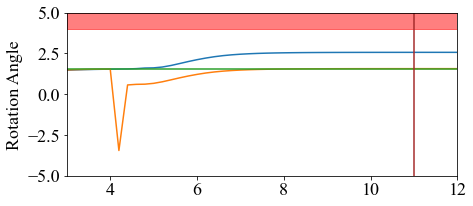

In [66]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_ylim(-5,5)
ax.set_xlim(3,12)
ax.plot(a.t_arr, a.y_real_arr,label='real')
ax.plot(a.t_arr, measures,label='measure')
ax.plot(a.t_arr, a.ref,label='ref')
ax.axhspan(4, 5, color='r', alpha=0.5)
ax.axvline((a.place+2+k)*a.Ts, color='brown',label='stable')
ax.set_ylabel('Rotation Angle', fontsize=18)
# ax.legend()
fig.show()
# fig.savefig('dc_unsafe_ref.pdf',bbox_inches='tight')
fig.savefig('dc_safe_limit10.pdf',bbox_inches='tight')
# fig.savefig('vt_unsafe_thres.pdf',bbox_inches='tight')

In [55]:
a = qd()
print(a.sysc)
a.ref = [2] * 601 + [7] * 600 + [2] *300
# a.thres = 80

A = [[ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
     [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
     [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
     [ 0.   -9.81  0.    0.    0.    0.    0.    0.    0.  ]
     [ 9.81  0.    0.    0.    0.    0.    0.    0.    0.  ]
     [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
     [ 0.    0.    0.    1.    0.    0.    0.    0.    0.  ]
     [ 0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
     [ 0.    0.    0.    0.    0.    1.    0.    0.    0.  ]]

B = [[0.        ]
     [0.        ]
     [0.        ]
     [0.        ]
     [0.        ]
     [2.13675214]
     [0.        ]
     [0.        ]
     [0.        ]]

C = [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]
     [0.]
     [0.]
     [0.]]



In [56]:
#for ap and dc
control_inputs = []
measures = []
x_just_before = 0
pid = PID(P=a.p, I=a.i, D=a.d, current_time=0)
pid.setWindup(100)
pid.setSampleTime(a.Ts)
limit = 300
dist = 1
ratio = 0.2
for i in range(0, a.slot+1):
    a.y_real_arr.append(a.yreal)
    # sensor attack here
    a.score.append(a.s)
    pid.SetPoint = a.ref[i]
#     print(a.ymeasure,i * a.Ts)
    pid.update(feedback_value=a.ymeasure, current_time=i * a.Ts)
    a.cin = pid.output
    if a.cin>limit*dist*ratio:
        a.cin=limit*dist*ratio
    elif a.cin<-(limit*dist)*ratio:
        a.cin = -(limit*dist)*ratio
    else:
        a.cin=a.cin
    control_inputs.append(a.cin)
    if i>a.place:
        if (a.score[-1]==a.thres):
            a.att=a.drift
        else:
            a.att = a.thres+a.drift-a.score[-1]
            x_just_before = xout 
    yout, T, xout = lsim(a.sysc, a.cin, [0, a.Ts], a.xmeasure)
    yout2, T, xout2 = lsim(a.sysc, a.cin, [0, a.Ts], a.xreal)
    a.yreal=yout2[-1][-1]
    ypred = yout[-1][-1]
    a.xmeasure = xout[-1, :].T
    a.xreal = xout2[-1, :].T
    a.ymeasure = yout[-1][-1]-a.att
#     if i>a.place:
#         a.ymeasure = min(ymax[-1],yout[-1]-a.att)
    a.s = a.score[-1]+abs(ypred-a.ymeasure)-a.drift
    if(a.s<0):
        a.s=0
    measures.append(a.ymeasure)
#waht you need
# print(control_inputs)
# print(x_just_before)

In [57]:
# ---------------------------------------
max_k = 450
attack_inputs = control_inputs[a.place+2:]
print('attack_inputs=', attack_inputs)
for j in range(0, len(attack_inputs)-10):
    temp = attack_inputs[j:j+10]
    if 50 in temp or -50 in temp:
        continue
    vari = statistics.variance(temp)
    print(vari, end= ' ')
    if(vari < 1e-9):
        max_k = j
        print('this is temp')
        print(temp)
        break
print('max_k', max_k)

attack_inputs = np.array([control_inputs[a.place+2:]])
x_just_before = x_just_before[-1]
print(x_just_before, len(x_just_before.shape))
if len(x_just_before.shape) == 0:
    x_a = np.array([[x_just_before]])
else:
    x_a = np.array([[item] for item in x_just_before])
# def get_safetime(self, x_a, safe_set_lo, safe_set_up, control_list: np.array, max_k)
safe_set_lo = a.safeset['lo']
safe_set_up = a.safeset['up']
k = a.est.get_safetime(x_a, safe_set_lo, safe_set_up, attack_inputs, max_k)
print(k)

# ---------------------------------------
        


attack_inputs= [60.0, 60.0, -46.73488981054063, -46.73488981054063, -2.0899062661806433, -2.0899062661806433, -0.844527724214348, -0.844527724214348, -0.775323520531412, -0.775323520531412, -0.7395496690883265, -0.7395496690883265, -0.706208609966403, -0.706208609966403, -0.6743925898712124, -0.6743925898712124, -0.6440112639097447, -0.6208867817157885, -0.6208867817157885, -0.6013972552910598, -0.6013972552910598, -0.5745349036461789, -0.5745349036461789, -0.5486600476511824, -0.5486600476511824, -0.5239454286124677, -0.5239454286124677, -0.500344624236883, -0.500344624236883, -0.47780758455511, -0.47780758455511, -0.45628636101013853, -0.45628636101013853, -0.4357351623434512, -0.4357351623434512, -0.4161102614218628, -0.4161102614218628, -0.39736990229755537, -0.39736990229755537, -0.3794742113516524, -0.3794742113516524, -0.3623851124393222, -0.3493761117018141, -0.3493761117018141, -0.3384152318363028, -0.3384152318363028, -0.32330543014412594, -0.32330543014412594, -0.30875099282

i= 160 x_lo= [[-1.61000000e-05]
 [-1.61000000e-05]
 [-1.61000000e-05]
 [-2.53940453e-04]
 [-2.53940453e-04]
 [ 6.03859060e-02]
 [-2.74508981e-04]
 [-2.74508981e-04]
 [ 7.97596030e+00]]  x_up= [[1.61000000e-05]
 [1.61000000e-05]
 [1.61000000e-05]
 [2.53940453e-04]
 [2.53940453e-04]
 [6.04181060e-02]
 [2.74508981e-04]
 [2.74508981e-04]
 [7.97602378e+00]]
i= 161 x_lo= [[-1.62000000e-05]
 [-1.62000000e-05]
 [-1.62000000e-05]
 [-2.57100856e-04]
 [-2.57100856e-04]
 [ 5.93743327e-02]
 [-2.79605845e-04]
 [-2.79605845e-04]
 [ 7.97715789e+00]]  x_up= [[1.62000000e-05]
 [1.62000000e-05]
 [1.62000000e-05]
 [2.57100856e-04]
 [2.57100856e-04]
 [5.94067327e-02]
 [2.79605845e-04]
 [2.79605845e-04]
 [7.97722204e+00]]
i= 162 x_lo= [[-1.63000000e-05]
 [-1.63000000e-05]
 [-1.63000000e-05]
 [-2.60280868e-04]
 [-2.60280868e-04]
 [ 5.83627593e-02]
 [-2.84766071e-04]
 [-2.84766071e-04]
 [ 7.97833524e+00]]  x_up= [[1.63000000e-05]
 [1.63000000e-05]
 [1.63000000e-05]
 [2.60280868e-04]
 [2.60280868e-04]
 [5.8395

<ipython-input-58-af4037a04b1d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


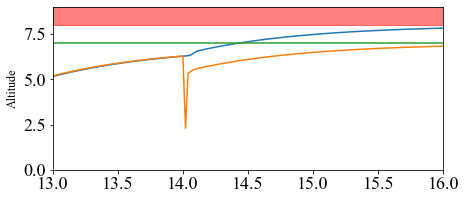

In [58]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.set_ylim(0,9)
ax.set_xlim(13,16)
ax.plot(a.t_arr, a.y_real_arr,label='real')
ax.plot(a.t_arr, measures,label='measure')
ax.plot(a.t_arr, a.ref,label='ref')
ax.axhspan(8, 9, color='r', alpha=0.5)
ax.axvline((a.place+2+k)*a.Ts, color='brown',label='stable')
ax.set_ylabel('Altitude', fontsize=12)
# ax.legend()
fig.show()
# fig.savefig('qd_unsafe_ref.pdf',bbox_inches='tight')
# fig.savefig('qd_safe.pdf',bbox_inches='tight')
# fig.savefig('qd_unsafe_thres.pdf',bbox_inches='tight')